This is the notebook for the survey data EDA and feature engineering. </br>
Data source: https://www.kaggle.com/code/kairosart/machine-learning-for-mental-health-1/data?select=survey.csv

In [ ]:
#imports
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
survey_data = pd.read_csv("/content/drive/Shareddrives/Capstone Project/ML_DL_work/Datasets/survey.csv")

In [ ]:
survey_data.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [ ]:
survey_data.shape

(1259, 27)

In [ ]:
survey_data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
no_employees                 object
remote_work                  object
tech_company                 object
care_options                 object
wellness_program             object
seek_help                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_vs_physical           object
dtype: object

In [ ]:
survey_data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

## About the dataset
* There are 25 features (excluding Timestamp and treatment which is the target column)
* There s a mix of numerical and categorical values (one numerical, rest are categorical)
* There is one numerical feature (Age) and it is continuous
* We can drop timestamp and treatment columns
* There are 1259 samples with 637 samples identified as "needing treatment" and 622 samples identified as "not needing treatment"


## Feature Engineering
* Based on our interaction with a psycologist, we identify features that do not contribute to the prediction and drop these columns. The features dropped are, "work_interfere", "anonymity", "benefits", "mental_health_interview", "phys_health_interview", "obs_consequence", "comments". These features are dropped without EDA



In [ ]:
#dropping columns are discussed above
survey_data.drop(["Timestamp", "work_interfere", "anonymity", "benefits", "mental_health_interview", "phys_health_interview", "obs_consequence", "comments"], axis=1, inplace=True)

In [ ]:
features = [c for c in survey_data.columns if c not in ("Age")]
for col in features:
  print("-----------------Column: %s --------"%col)
  print(survey_data[col].value_counts())

-----------------Column: Gender --------
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                 

## Cleaning the data
* There are 18 samples with unknown values for "self_employed" and 515 sampels with unknown "state"
* There are no duplicates
* "Gender" looks like a very messy column. Needs a lot of cleaning
* Age changed to ranged data (as below)
* self-employed and state remain optional columns
* Age column is reduced to ranges, ["0-20", "21-30", "31-40", "41-50", "51-70","71-100"]

In [ ]:
survey_data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
no_employees                   0
remote_work                    0
tech_company                   0
care_options                   0
wellness_program               0
seek_help                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_vs_physical             0
dtype: int64

In [ ]:
survey_data.duplicated().sum()

0

In [ ]:
survey_data['Gender'] = survey_data['Gender'].str.lower()

In [ ]:
survey_data['Gender'] = survey_data['Gender'].str.replace(r'^m.*','male', regex=True)
survey_data['Gender'] = survey_data['Gender'].str.replace(r'^f.*','female', regex=True)

In [ ]:
male = ['cis male', 'cis man']
female = ['cis female', 'woman', 'cis-female/femme']
for option in male:
  survey_data['Gender'] = survey_data['Gender'].str.replace(option,'male', regex=False)

for option in female:
  survey_data['Gender'] = survey_data['Gender'].str.replace(option,'female', regex=False)

other = ["queer", "neuter", "genderqueer", "androgyne", "all", "non-binary", "trans", "agender", "queer/she/they", "other/she/they", "other", "other-female", "genderother", "other female"]
for option in other:
  survey_data['Gender'] = survey_data['Gender'].str.replace(option,'other', regex=False)

#others are ambiguous, map to nan
nan = ["something kinda male?", "nah", "enby", "guy (-ish) ^_^", "a little about you", "p", "ostensibly male, unsure what that reothery means"]
for option in nan:
  survey_data['Gender'] = survey_data['Gender'].str.replace(option,'?', regex=False)

In [ ]:
survey_data['Gender'].value_counts()

male      992
female    250
other      10
?           7
Name: Gender, dtype: int64

## Univariate Analysis
* Here we plot the distribution of every feature
* Idealy a feature that is significantly dominated by one feature may not be helpful as it will not be able to give much information. This is a quick way to filter which feature may not be useful
* In put case, we do not have any feature that is dominated by one value. The feature "self-employed" is sort of skewed but the difference in the attributes is not insignificant. So, we choose to retain this feature

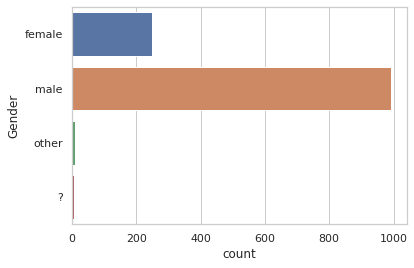

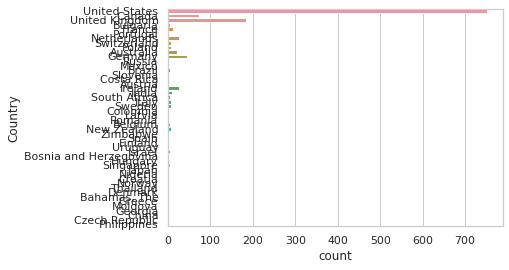

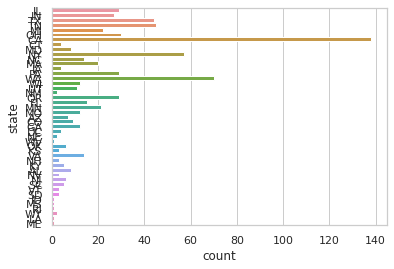

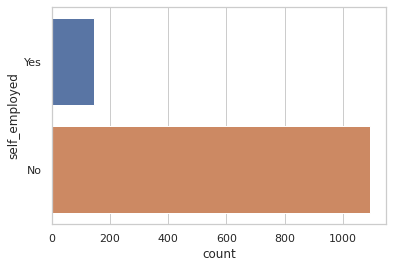

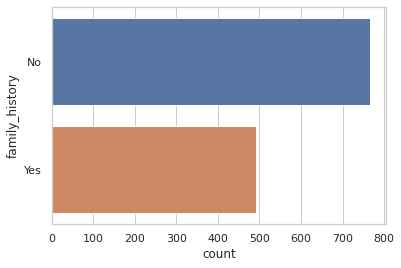

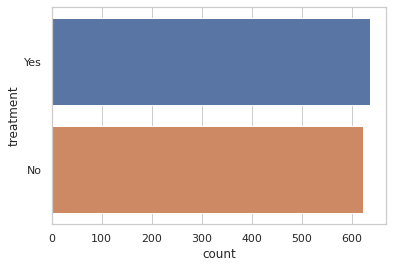

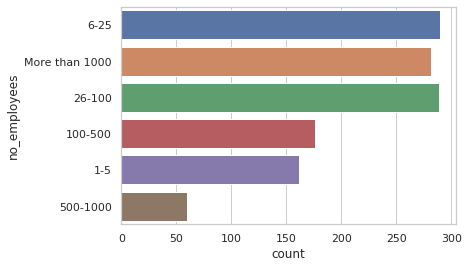

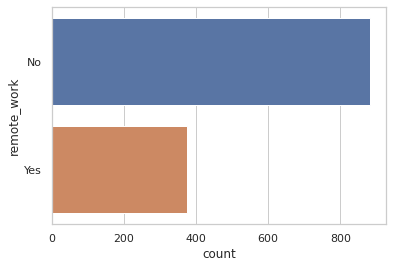

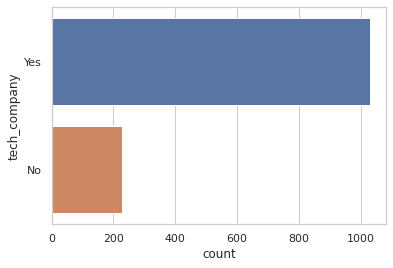

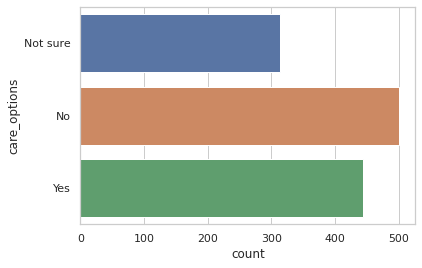

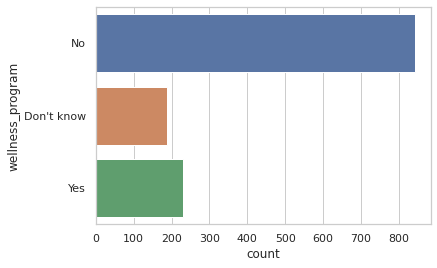

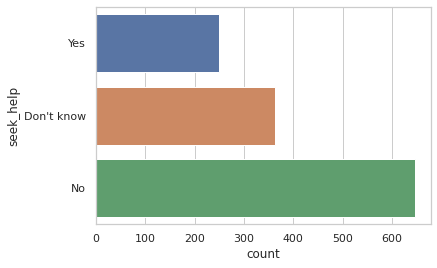

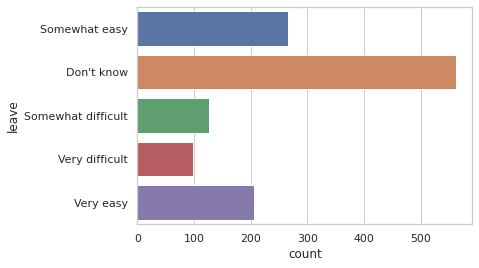

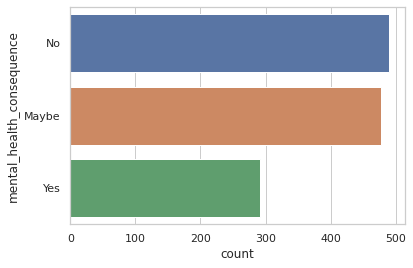

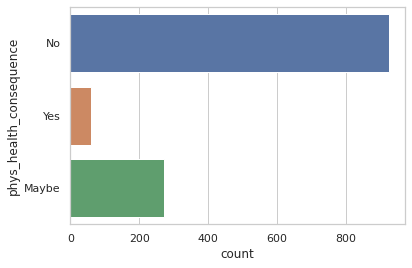

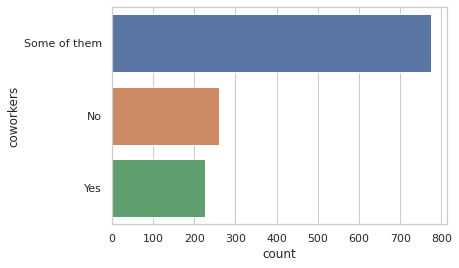

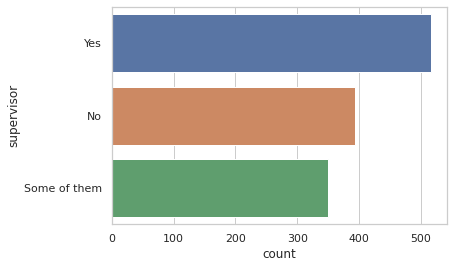

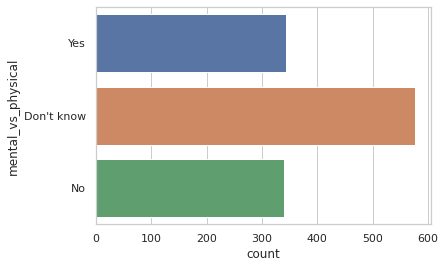

In [ ]:
# num_cols = ['Age']
sns.set_theme(style="whitegrid")
for i,cols in enumerate(survey_data.columns):
  if not cols=='Age':
    plt.figure(i)
    sns.countplot(y=survey_data[cols], data=survey_data)

In [ ]:
s = pd.Series(survey_data['Age'])
s[s<18] = survey_data['Age'].median()
survey_data['Age'] = s
s = pd.Series(survey_data['Age'])
s[s>120] = survey_data['Age'].median()
survey_data['Age'] = s

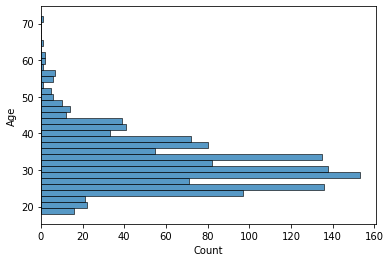

In [ ]:
sns.histplot(y=survey_data['Age'], data=survey_data)

In [ ]:
survey_data['age_range'] = pd.cut(survey_data['Age'], [0,20,30,40,50,70,100], labels=["0-20", "21-30", "31-40", "41-50", "51-70","71-100"], include_lowest=True)

In [ ]:
survey_data['age_range'].value_counts()

21-30     557
31-40     532
41-50     122
51-70      25
0-20       22
71-100      1
Name: age_range, dtype: int64

In [ ]:
# survey_data.drop("Age", axis=1, inplace=True)
survey_data.to_csv("/content/drive/Shareddrives/Capstone Project/ML_DL_work/Datasets/survey_cleaned.csv", index=False)

## Bivariate Analysis
* Here features are plotted against the target column, treatment
* Similar to the univariate analysis we find that all values have almost an obsevable distribution of whether a treatment is needed or not 
* No significant feature engineering can be made out of this analysis

In [ ]:
survey_data = pd.read_csv("/content/drive/Shareddrives/Capstone Project/ML_DL_work/Datasets/survey_cleaned.csv")

<Figure size 432x288 with 0 Axes>

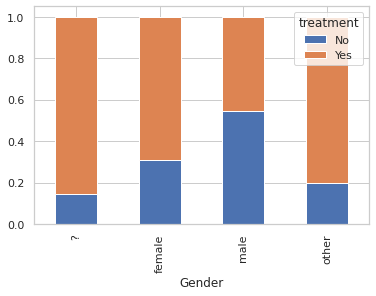

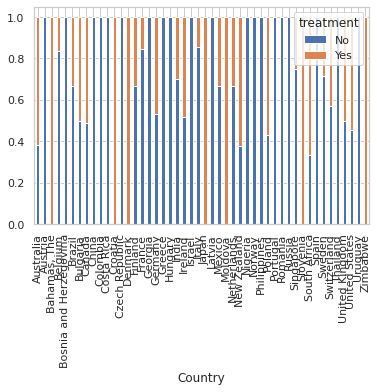

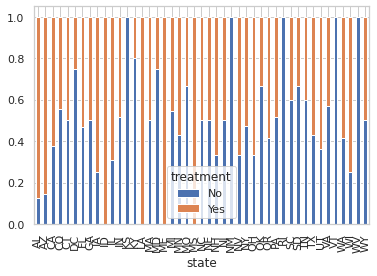

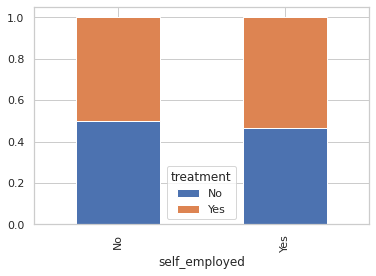

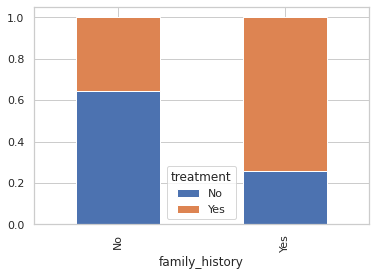

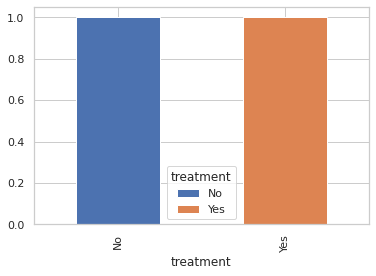

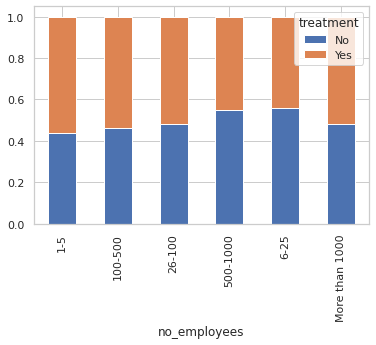

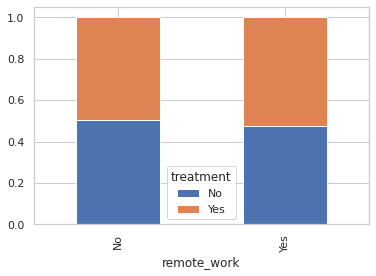

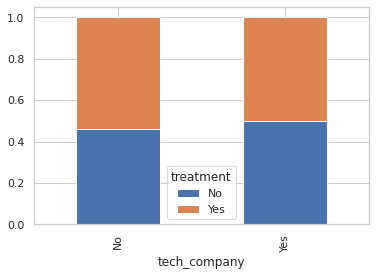

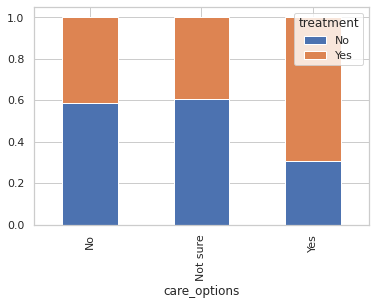

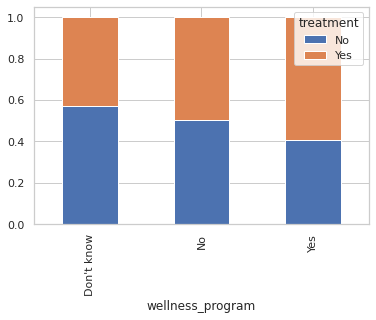

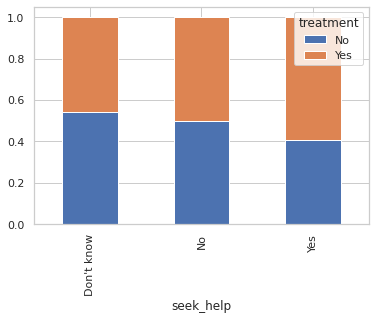

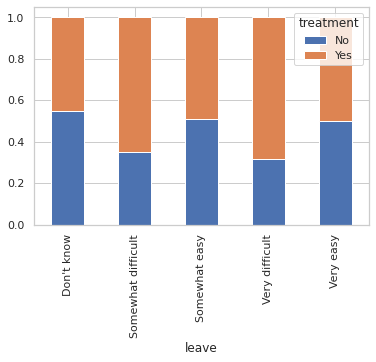

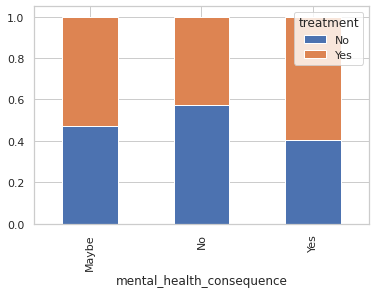

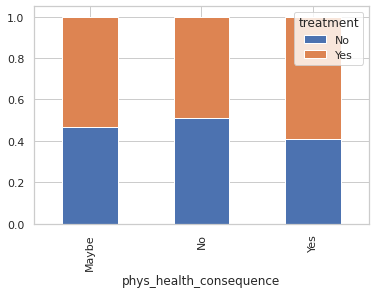

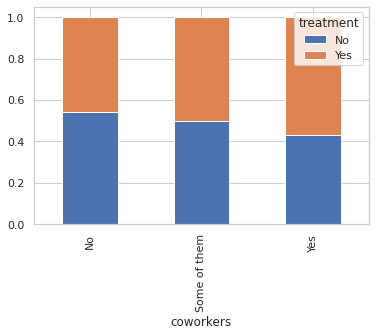

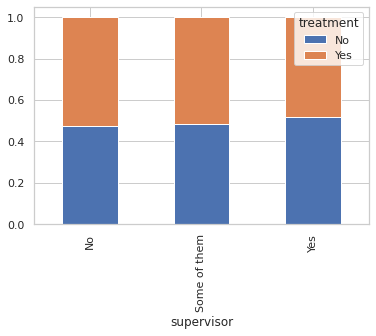

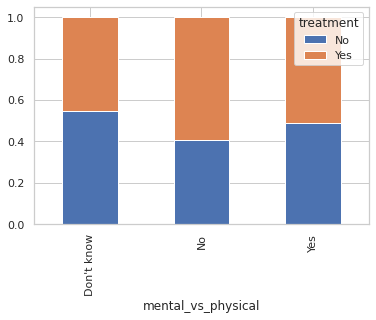

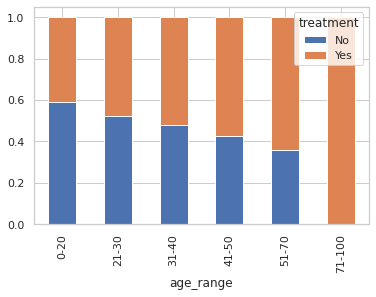

In [ ]:
sns.set_theme(style="whitegrid")
for i,cols in enumerate(survey_data.columns):
  plt.figure(i)
  df_sub = pd.crosstab(index=survey_data[cols],
                        columns=survey_data['treatment'],
                        normalize="index")
  df_sub.plot(kind='bar', 
                    stacked=True)



##Encoding

In [ ]:
survey_data = pd.read_csv("/content/drive/Shareddrives/Capstone Project/ML_DL_work/Datasets/survey_cleaned.csv")

In [ ]:
survey_data['Gender']

0       female
1         male
2         male
3         male
4         male
         ...  
1254      male
1255      male
1256      male
1257    female
1258      male
Name: Gender, Length: 1259, dtype: object

In [ ]:
def print_codes(code, col):
  d = dict(enumerate(code.cat.categories))
  print(col, d)

codes = []
for col in survey_data.columns:
  col_codes = survey_data[col].astype('category')
  codes.append(col_codes)
  survey_data[col] = col_codes.cat.codes
  print_codes(col_codes, col)

#nan will be mapped to -1

Gender {0: '?', 1: 'female', 2: 'male', 3: 'other'}
Country {0: 'Australia', 1: 'Austria', 2: 'Bahamas, The', 3: 'Belgium', 4: 'Bosnia and Herzegovina', 5: 'Brazil', 6: 'Bulgaria', 7: 'Canada', 8: 'China', 9: 'Colombia', 10: 'Costa Rica', 11: 'Croatia', 12: 'Czech Republic', 13: 'Denmark', 14: 'Finland', 15: 'France', 16: 'Georgia', 17: 'Germany', 18: 'Greece', 19: 'Hungary', 20: 'India', 21: 'Ireland', 22: 'Israel', 23: 'Italy', 24: 'Japan', 25: 'Latvia', 26: 'Mexico', 27: 'Moldova', 28: 'Netherlands', 29: 'New Zealand', 30: 'Nigeria', 31: 'Norway', 32: 'Philippines', 33: 'Poland', 34: 'Portugal', 35: 'Romania', 36: 'Russia', 37: 'Singapore', 38: 'Slovenia', 39: 'South Africa', 40: 'Spain', 41: 'Sweden', 42: 'Switzerland', 43: 'Thailand', 44: 'United Kingdom', 45: 'United States', 46: 'Uruguay', 47: 'Zimbabwe'}
state {0: 'AL', 1: 'AZ', 2: 'CA', 3: 'CO', 4: 'CT', 5: 'DC', 6: 'FL', 7: 'GA', 8: 'IA', 9: 'ID', 10: 'IL', 11: 'IN', 12: 'KS', 13: 'KY', 14: 'LA', 15: 'MA', 16: 'MD', 17: 'ME',

In [ ]:
survey_data.to_csv("/content/drive/Shareddrives/Capstone Project/ML_DL_work/Datasets/survey_encoded.csv", index=False) #encoded dataset

In [ ]:
'''
Reference:
https://www.kaggle.com/code/darrenljw/eda-feature-engineering
'''